In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.wkt import loads
import statsmodels.api as sm

In [18]:
tracts_demo = pd.read_csv('../Data/demog_tract_level.csv')
tracts_demo.head()

,Tract,Pop_Tot,Pop_18,%White,%Black,%Hispanic_Latino,%Asian,%Other,%Mixed,Median_Income,%Edu_hs,%Edu_bac
0,36005020000,4711,3310,2.759499,9.382297,61.197198,23.392061,2.080238,1.188707,40184,71.873112,23.685801
1,36005020501,6976,5313,1.046445,26.333142,71.530963,0.788417,0.000000,0.301032,17601,71.052136,9.655562
2,36005020502,2160,1737,1.666667,26.435185,71.481481,0.138889,0.000000,0.277778,18919,64.824410,17.962003
3,36005020900,4287,3297,3.825519,37.602053,57.872638,0.256590,0.209937,0.233263,31190,74.309979,14.922657
4,36005021001,8930,7185,2.183651,50.470325,36.125420,8.801792,1.209406,1.209406,54076,85.901183,24.982603


In [19]:
transit_access = pd.read_csv('../Data/tracts_subway_bus_access.csv',index_col=0)
transit_access.head()

,ctlabel,borocode,boroname,ct2020,boroct2020,ntaname,nta2020,cdta2020,cdtaname,geoid,shape_leng,shape_area,geometry,Bus_Access,Subway_Access,Bus_Count,Subway_Count
0,1.00,1,Manhattan,100,1000100,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.048501,1.844421e+06,MULTIPOLYGON (((-74.04387761639944 40.69018767...,0,0,0,0
1,2.01,1,Manhattan,201,1000201,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.495247,9.723121e+05,MULTIPOLYGON (((-73.98449647076764 40.70950966...,1,1,23,3
2,6.00,1,Manhattan,600,1000600,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,6976.286456,2.582705e+06,MULTIPOLYGON (((-73.99022012669926 40.71440493...,1,1,25,4
3,14.01,1,Manhattan,1401,1001401,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,5075.332000,1.006117e+06,MULTIPOLYGON (((-73.9883662631772 40.716445702...,1,1,26,4
4,14.02,1,Manhattan,1402,1001402,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4459.156019,1.226206e+06,MULTIPOLYGON (((-73.98507342254645 40.71908329...,1,1,30,4


In [25]:
#merge
tract_info = transit_access.merge(tracts_demo, left_on = 'geoid', right_on = 'Tract', how = 'left')
tract_info['geometry'] = tract_info['geometry'].apply(loads)

tract_info = gpd.GeoDataFrame(tract_info,geometry = 'geometry', crs = '4326')
tract_info.head()

,ctlabel,borocode,boroname,ct2020,boroct2020,ntaname,nta2020,cdta2020,cdtaname,geoid,...,Pop_18,%White,%Black,%Hispanic_Latino,%Asian,%Other,%Mixed,Median_Income,%Edu_hs,%Edu_bac
0,1.00,1,Manhattan,100,1000100,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-666666666.0,NaN,NaN
1,2.01,1,Manhattan,201,1000201,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,...,2120.0,10.472727,6.618182,40.181818,42.654545,0.000000,0.072727,29500.0,55.990566,17.122642
2,6.00,1,Manhattan,600,1000600,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,...,8585.0,4.675747,7.267737,28.339093,58.843261,0.874161,0.000000,16600.0,52.486896,17.157833
3,14.01,1,Manhattan,1401,1001401,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,...,2523.0,68.220899,3.240741,8.796296,15.674603,0.264550,3.802910,103750.0,95.838288,69.480777
4,14.02,1,Manhattan,1402,1001402,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,...,2790.0,28.051683,5.542333,31.587895,29.955797,0.000000,4.862292,27355.0,71.648746,37.849462


<AxesSubplot:>

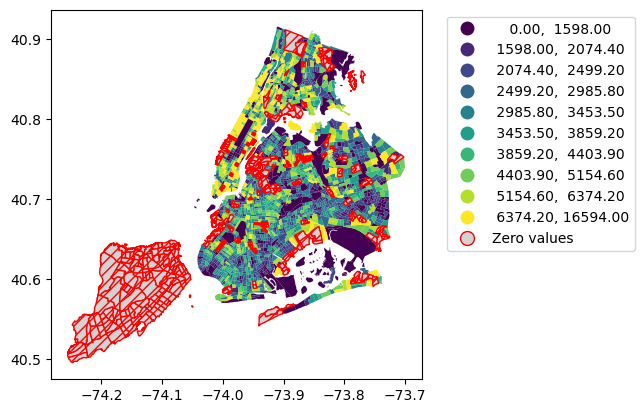

In [26]:
tract_info.plot(column = 'Pop_Tot', k=10, scheme='Quantiles', legend=True, 
              missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})

In [50]:
#create a fake transit time column for example
values = np.random.normal(30, 10, len(tract_info))+np.random.randint(low=0, high=10, size=len(tract_info))
# Set values less than or equal to zero to 1 (minimum value)
values = np.maximum(values, 1)
tract_info['commute_time'] = values

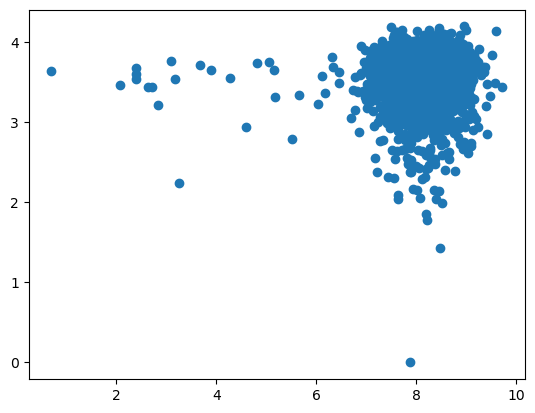

In [64]:
tract_info = tract_info[(tract_info['Pop_Tot'] != 0) & (tract_info['commute_time'] != 0)].dropna()
tract_info['ln Pop'] = np.log(tract_info['Pop_Tot'])
tract_info['ln commute'] = np.log(tract_info['commute_time'])
tract_info = tract_info.sort_values(by ='ln Pop')
plt.plot(tract_info['ln Pop'],tract_info['ln commute'],'o')

In [66]:
# Extract the two variables of interest
X = tract_info['ln Pop']
X = sm.add_constant(X)
y = tract_info['ln commute']

# Create the linear regression model
model = sm.OLS(y, X)

# Fit the model and print the results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             ln commute   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3557
Date:                Tue, 11 Apr 2023   Prob (F-statistic):              0.551
Time:                        21:56:07   Log-Likelihood:                -709.53
No. Observations:                1899   AIC:                             1423.
Df Residuals:                    1897   BIC:                             1434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4394      0.093     37.097      0.0

InvalidIndexError: (slice(None, None, None), None)

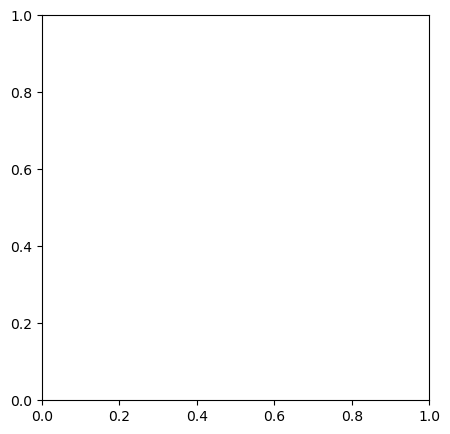

In [68]:
y_pred = results.predict(X)

fig, ax = plt.subplots(figsize = (5,5))
plt.plot(X,y,'o')
plt.plot(X,y_pred,'-r')
plt.show()

In [67]:
epsilon = y_pred - y

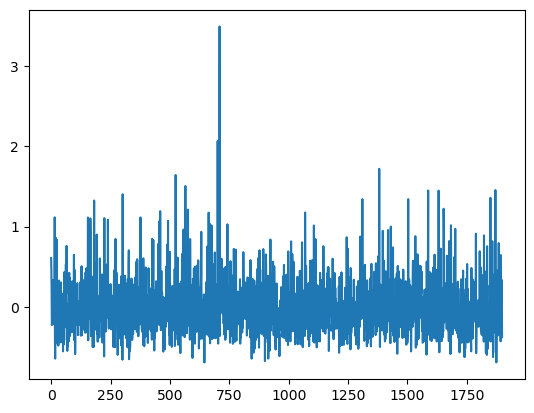

In [72]:
plt.plot(range(0,len(epsilon)),epsilon)